In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from flask import Flask, jsonify 
from pathlib import Path

In [4]:
database_path= "../Resources/hawaii.sqlite"

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
dates = Base.classes

In [10]:
measurement = Base.classes.measurement

In [11]:
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.


most_recent_date = session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

One year:  2016-08-23


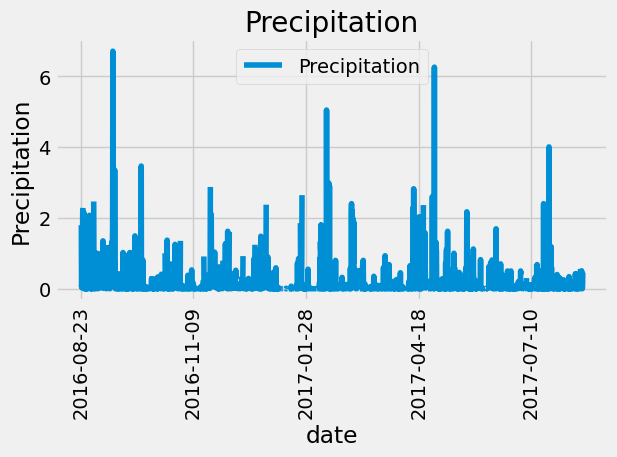

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

    
# Calculate the date one year from the last date in data set.

one_year = dt.date(2017, 8 ,23) - dt.timedelta(days = 365)
print("One year: ", one_year)



# Save the query results as a Pandas DataFrame. Explicitly set the column names
df= session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()
df=pd.DataFrame(df, columns=["date", "Precipitation"])
# Sort the dataframe by date
sorted_df = df.sort_values(by ="date")

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot('date', 'Precipitation', rot=90)
plt.xlabel('date')
plt.ylabel('Precipitation')
plt.title(f'Precipitation')
plt.xticks(rotation= 90)  # Rotate x-axis labels for better readability
plt.tight_layout()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = sorted_df.describe()
print(summary_statistics)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).count()

19550

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# count = session.query(station).group_by(station).all()
stationID = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(measurement.station).all()
stationID


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
df=session.query(measurement.station, func.min(measurement.station), func.max(measurement.station)).all()


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df= session.query(measurement.station).filter(measurement.station >= one_year).all()
df=pd.DataFrame(df, columns=["Frequency", "Temperature"])
# # Sort the dataframe by date
# sorted_df = df.sort_values(by ="")

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot('temperature', 'frequency', rot=90)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.title('frequency')
plt.xticks(rotation= 90)  # Rotate x-axis labels for better readability
plt.tight_layout()

ValueError: 2 columns passed, passed data had 1 columns

# Close Session

In [ ]:
# Close Session
session.close()

In [ ]:
from flask import Flask, jsonify 
app = Flask(__name__)


In [ ]:


@app.route("/api/v1.0/precipitaion")
def sorted_df():
     session = Session(engine)
    df = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()
    session.close()
    
    """Return the data as json"""

    return jsonify(measurement)

In [ ]:
@app.route("/api/v1.0/stations")

    return jsonify(measurement)

In [ ]:
@app.route("/api/v1.0/tobs")
def stationID():
    session = Session(engine)
    stationID = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(measurement.station).all()
    
    """Return the data as json"""

    return jsonify(station)

In [ ]:
session.query(measurement, station).all()